In [32]:
import pandas as pd
from pathlib import Path
import os

base_directory = Path(os.getcwd()).parent
file_path = "data\\PL_data.csv"
path = os.path.join(base_directory, file_path)

print(path)

c:\Energy-Demand-Prediction\data\PL_data.csv


In [33]:
df = pd.read_csv(path, delimiter=",", parse_dates=["time"], index_col="time")
df

,PL_load MW,hour,dayofweek,month,is_weekend,season,is_holiday,day_night,Load_lag_1h,Load_lag_2h,Load_lag_6h,Load_lag_24h,Load_rolling_mean_24h
time,,,,,,,,,,,,,
2015-01-02 02:00:00,13010.58,1,4,1,0,1,0,0,13258.48,13720.80,17264.15,13979.46,14920.307083
2015-01-02 03:00:00,13006.90,2,4,1,0,1,0,0,13010.58,13258.48,16559.75,13453.78,14901.687083
2015-01-02 04:00:00,13241.45,3,4,1,0,1,0,0,13006.90,13010.58,15860.24,13306.00,14898.997500
2015-01-02 05:00:00,13985.83,4,4,1,0,1,0,0,13241.45,13006.90,14705.78,13175.58,14932.757917
2015-01-02 06:00:00,15719.83,5,4,1,0,1,0,0,13985.83,13241.45,13720.80,13165.11,15039.204583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 20:00:00,22467.26,18,2,9,0,4,0,0,23201.60,22305.06,21929.09,22738.93,20276.732500
2020-09-30 21:00:00,20788.89,19,2,9,0,4,0,0,22467.26,23201.60,21794.91,21026.58,20266.828750
2020-09-30 22:00:00,19040.56,20,2,9,0,4,0,0,20788.89,22467.26,21653.08,19305.53,20255.788333


In [34]:
from sklearn.model_selection import train_test_split


y = df["PL_load MW"]  
X = df.drop(columns=["PL_load MW"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [35]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)

MAE: 135.99298522797767
RMSE: 185.5913548784635


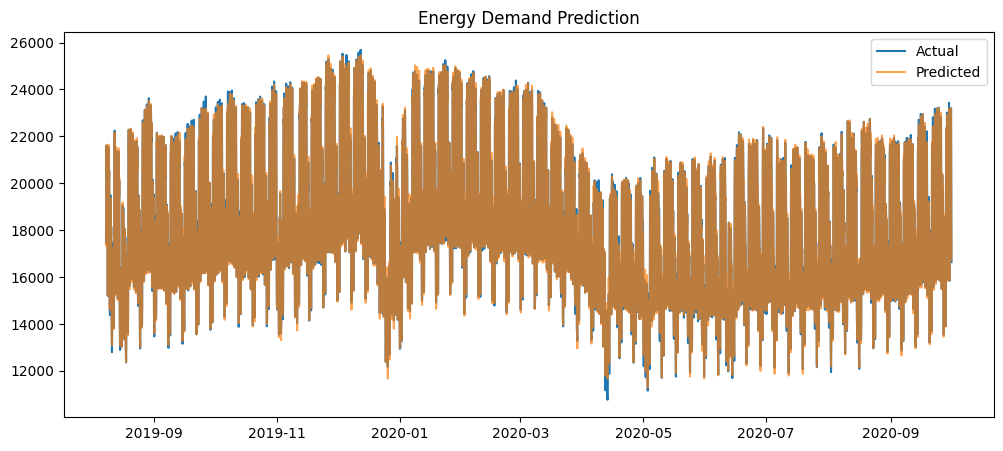

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Energy Demand Prediction")
plt.show()

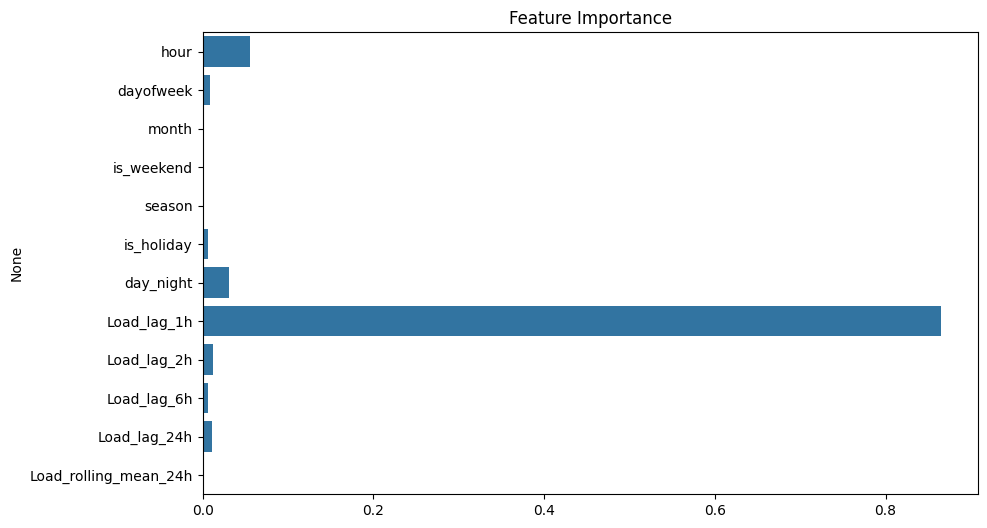

In [38]:
import seaborn as sns

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()

In [39]:
import pandas as pd

feat_importance = pd.Series(model.feature_importances_, index=X.columns)

print(feat_importance)

hour                     0.055374
dayofweek                0.008420
month                    0.001855
is_weekend               0.000000
season                   0.001902
is_holiday               0.005907
day_night                0.030774
Load_lag_1h              0.864587
Load_lag_2h              0.012642
Load_lag_6h              0.006108
Load_lag_24h             0.010459
Load_rolling_mean_24h    0.001971
dtype: float32


In [40]:
selected_features = feat_importance[feat_importance > 0.01].index
X_selected = X[selected_features]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, shuffle=False
)

In [42]:
model.fit(X_selected, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [43]:
y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)

MAE: 139.20082962546527
RMSE: 190.71629543449046


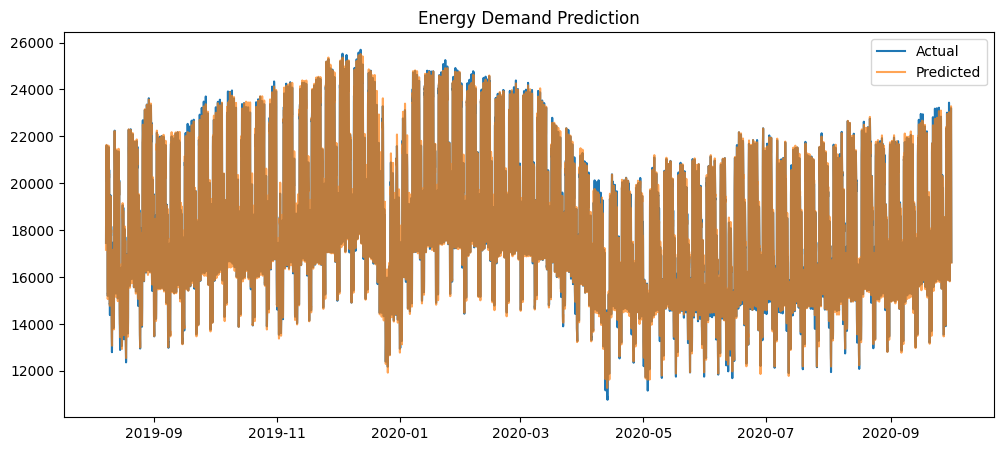

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Energy Demand Prediction")
plt.show()

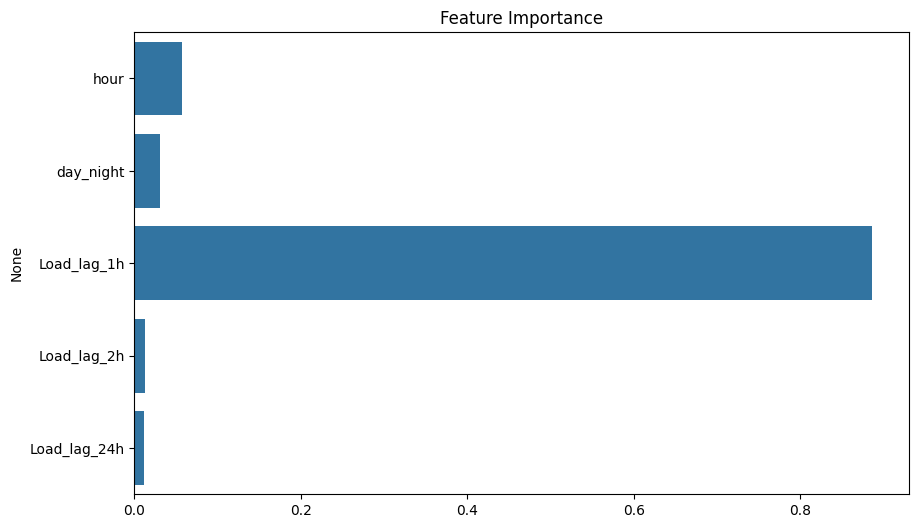

Index(['hour', 'day_night', 'Load_lag_1h', 'Load_lag_2h', 'Load_lag_24h'], dtype='object')


In [45]:
import seaborn as sns

importance = model.feature_importances_
features = X_selected.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()
print(X_selected.columns)

In [46]:
file_path = "models\\xboost_test.json"
path = os.path.join(base_directory, file_path)

model.save_model(path) 